# Improving Process
## by Paula Roigés

## Preliminary Wrangling

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd

import seaborn as sns
sns.set(style="darkgrid")

import datetime
import random

import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

%matplotlib inline

In [2]:
# read files: 1. facial_similarity_reports.csv 
fsr_df = pd.read_csv('facial_similarity_reports.csv')
fsr_df

,Unnamed: 0,user_id,result,face_comparison_result,created_at,facial_image_integrity_result,visual_authenticity_result,properties,attempt_id
0,0,ab23fae164e34af0a1ad1423ce9fd9f0,clear,clear,2017-06-20T23:12:58Z,clear,consider,{},050a0596de424fab83c433eaa18b3f8d
1,1,15a84e8951254011b47412fa4e8f65b8,clear,clear,2017-06-20T23:16:04Z,clear,clear,{},f69c1e5f45a64e50a26740b9bfb978b7
2,2,ffb82fda52b041e4b9af9cb4ef298c85,clear,clear,2017-06-20T17:59:49Z,clear,clear,{},f9f84f3055714d8e8f7419dc984d1769
3,3,bd4a8b3e3601427e88aa1d9eab9f4290,clear,clear,2017-06-20T17:59:39Z,clear,clear,{},10a54a1ecf794404be959e030f11fef6
4,4,f52ad1c7e69543a9940c3e7f8ed28a39,clear,clear,2017-06-20T18:08:09Z,clear,clear,{},1f320d1d07de493292b7e0d5ebfb1cb9
...,...,...,...,...,...,...,...,...,...
176399,181987,c7f99ee763bf45d289019c6ac2cbd919,clear,clear,2017-06-20T22:25:53Z,clear,clear,{},72a2cccc9e9942deb5274a16536bf2d0
176400,181988,8b47d72c363e4591861f523dd7487f20,clear,clear,2017-06-20T22:27:40Z,clear,clear,{},8c83017191204a3887c2d47ca2d998ce
176401,181989,3d16e02c245a4f1a8a76662ad933d5c4,clear,clear,2017-06-20T22:25:59Z,clear,clear,{},bfea35bcb6a940118ca5816cd8ffcae7
176402,181990,65c49a09d299486091b6586487679b87,clear,clear,2017-06-20T22:35:41Z,clear,clear,{},9190cf28b35b425083bdb41e121822fe


In [3]:
fsr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176404 entries, 0 to 176403
Data columns (total 9 columns):
Unnamed: 0                       176404 non-null int64
user_id                          176404 non-null object
result                           176403 non-null object
face_comparison_result           166007 non-null object
created_at                       176404 non-null object
facial_image_integrity_result    175941 non-null object
visual_authenticity_result       150290 non-null object
properties                       176404 non-null object
attempt_id                       176404 non-null object
dtypes: int64(1), object(8)
memory usage: 12.1+ MB


In [4]:
# read files: 2. doc_reports.csv
dr_df = pd.read_csv('doc_reports.csv')
dr_df

,Unnamed: 0,user_id,result,visual_authenticity_result,image_integrity_result,face_detection_result,image_quality_result,created_at,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,attempt_id,police_record_result,compromised_document_result,properties,sub_result
0,0,ab23fae164e34af0a1ad1423ce9fd9f0,consider,consider,clear,clear,clear,2017-06-20T23:12:57Z,clear,NaN,NaN,clear,clear,NaN,050a0596de424fab83c433eaa18b3f8d,clear,NaN,"{'gender': 'Male', 'nationality': 'IRL', 'docu...",caution
1,1,15a84e8951254011b47412fa4e8f65b8,clear,clear,clear,clear,clear,2017-06-20T23:16:04Z,clear,NaN,NaN,clear,NaN,NaN,f69c1e5f45a64e50a26740b9bfb978b7,clear,NaN,"{'gender': 'Female', 'document_type': 'driving...",clear
2,2,ffb82fda52b041e4b9af9cb4ef298c85,clear,clear,clear,clear,clear,2017-06-20T17:59:49Z,clear,NaN,NaN,clear,clear,NaN,f9f84f3055714d8e8f7419dc984d1769,clear,NaN,"{'gender': 'Male', 'nationality': 'ITA', 'docu...",clear
3,3,bd4a8b3e3601427e88aa1d9eab9f4290,clear,clear,clear,clear,clear,2017-06-20T17:59:38Z,clear,NaN,NaN,clear,clear,NaN,10a54a1ecf794404be959e030f11fef6,clear,NaN,"{'gender': 'Male', 'issuing_date': '2007-08', ...",clear
4,4,f52ad1c7e69543a9940c3e7f8ed28a39,clear,clear,clear,clear,clear,2017-06-20T18:08:09Z,clear,NaN,NaN,clear,clear,NaN,1f320d1d07de493292b7e0d5ebfb1cb9,clear,NaN,"{'gender': 'Male', 'nationality': 'POL', 'docu...",clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176399,181987,c7f99ee763bf45d289019c6ac2cbd919,clear,clear,clear,clear,clear,2017-06-20T22:25:53Z,clear,NaN,NaN,clear,clear,NaN,72a2cccc9e9942deb5274a16536bf2d0,clear,NaN,"{'gender': 'Female', 'nationality': 'CHN', 'do...",clear
176400,181988,8b47d72c363e4591861f523dd7487f20,clear,clear,clear,clear,clear,2017-06-20T22:27:40Z,clear,NaN,NaN,clear,NaN,NaN,8c83017191204a3887c2d47ca2d998ce,clear,NaN,"{'gender': 'Female', 'document_type': 'driving...",clear
176401,181989,3d16e02c245a4f1a8a76662ad933d5c4,clear,clear,clear,clear,clear,2017-06-20T22:25:59Z,clear,NaN,NaN,clear,clear,NaN,bfea35bcb6a940118ca5816cd8ffcae7,clear,NaN,"{'gender': 'Female', 'nationality': 'GBR', 'do...",clear
176402,181990,65c49a09d299486091b6586487679b87,clear,clear,clear,clear,clear,2017-06-20T22:35:40Z,clear,NaN,NaN,clear,clear,NaN,9190cf28b35b425083bdb41e121822fe,clear,NaN,"{'gender': 'Male', 'nationality': 'PRT', 'docu...",clear


In [5]:
dr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176404 entries, 0 to 176403
Data columns (total 19 columns):
Unnamed: 0                            176404 non-null int64
user_id                               176404 non-null object
result                                176404 non-null object
visual_authenticity_result            150290 non-null object
image_integrity_result                176403 non-null object
face_detection_result                 150261 non-null object
image_quality_result                  176403 non-null object
created_at                            176404 non-null object
supported_document_result             175900 non-null object
conclusive_document_quality_result    95217 non-null object
colour_picture_result                 95222 non-null object
data_validation_result                142974 non-null object
data_consistency_result               92229 non-null object
data_comparison_result                2548 non-null object
attempt_id                            176

In [6]:
# Checking same columns have same values

fsr_df['user_id'].isin(dr_df['user_id']).value_counts()

True    176404
Name: user_id, dtype: int64

In [7]:
fsr_df['Unnamed: 0'].isin(dr_df['Unnamed: 0']).value_counts()

True    176404
Name: Unnamed: 0, dtype: int64

Note: Rename 'Unnamed: 0'

In [8]:
# Cleanning: Reanming
fsr_df.rename(index = str, columns = {'Unnamed: 0': 'id'}, inplace = True)
dr_df.rename(index = str, columns = {'Unnamed: 0': 'id'}, inplace = True)

In [9]:
fsr_df.rename(index = str, columns = {'created_at': 'created_at_fsr'}, inplace = True)
dr_df.rename(index = str, columns = {'created_at': 'created_at_dr'}, inplace = True)

In [10]:
fsr_df.rename(index = str, columns = {'result': 'result_fsr'}, inplace = True)
dr_df.rename(index = str, columns = {'result': 'result_dr'}, inplace = True)

In [11]:
fsr_df['visual_authenticity_result'].isin(dr_df['visual_authenticity_result']).value_counts()

True    176404
Name: visual_authenticity_result, dtype: int64

In [12]:
fsr_df['attempt_id'].isin(dr_df['attempt_id']).value_counts()

True     176403
False         1
Name: attempt_id, dtype: int64

In [13]:
# Cleaning: renaming

fsr_df.rename(index = str, columns = {'attempt_id': 'attempt_id_fsr'}, inplace = True)
dr_df.rename(index = str, columns = {'attempt_id': 'attempt_id_dr'}, inplace = True)

In [14]:
fsr_df['created_at_fsr'].isin(dr_df['created_at_dr']).value_counts()

True     167316
False      9088
Name: created_at_fsr, dtype: int64

#### Test cleanning changes

In [15]:
fsr_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176404 entries, 0 to 176403
Data columns (total 9 columns):
id                               176404 non-null int64
user_id                          176404 non-null object
result_fsr                       176403 non-null object
face_comparison_result           166007 non-null object
created_at_fsr                   176404 non-null object
facial_image_integrity_result    175941 non-null object
visual_authenticity_result       150290 non-null object
properties                       176404 non-null object
attempt_id_fsr                   176404 non-null object
dtypes: int64(1), object(8)
memory usage: 13.5+ MB


In [16]:
dr_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176404 entries, 0 to 176403
Data columns (total 19 columns):
id                                    176404 non-null int64
user_id                               176404 non-null object
result_dr                             176404 non-null object
visual_authenticity_result            150290 non-null object
image_integrity_result                176403 non-null object
face_detection_result                 150261 non-null object
image_quality_result                  176403 non-null object
created_at_dr                         176404 non-null object
supported_document_result             175900 non-null object
conclusive_document_quality_result    95217 non-null object
colour_picture_result                 95222 non-null object
data_validation_result                142974 non-null object
data_consistency_result               92229 non-null object
data_comparison_result                2548 non-null object
attempt_id_dr                         176404 n

In [17]:
fsr_df['id'].isin(dr_df['id']).value_counts()

True    176404
Name: id, dtype: int64

### Merging files

In [18]:
# Test same id's method 1

fsr_df.user_id.nunique() == dr_df.user_id.nunique()

True

In [19]:
condition = fsr_df['id'] != dr_df['id']
diff1 = fsr_df[condition]
diff2 = dr_df[condition]
diff1.merge(diff2, on=['id','user_id'], suffixes=('before', 'after'))

,result_fsr,face_comparison_result,created_at_fsr,facial_image_integrity_result,visual_authenticity_resultbefore,propertiesbefore,attempt_id_fsr,id,user_id,result_dr,...,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,attempt_id_dr,police_record_result,compromised_document_result,propertiesafter,sub_result


In [20]:
df = pd.merge(dr_df, fsr_df,
                         on = 'id', how = 'inner')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176404 entries, 0 to 176403
Data columns (total 27 columns):
id                                    176404 non-null int64
user_id_x                             176404 non-null object
result_dr                             176404 non-null object
visual_authenticity_result_x          150290 non-null object
image_integrity_result                176403 non-null object
face_detection_result                 150261 non-null object
image_quality_result                  176403 non-null object
created_at_dr                         176404 non-null object
supported_document_result             175900 non-null object
conclusive_document_quality_result    95217 non-null object
colour_picture_result                 95222 non-null object
data_validation_result                142974 non-null object
data_consistency_result               92229 non-null object
data_comparison_result                2548 non-null object
attempt_id_dr                         176

In [22]:
df.head(5)

,id,user_id_x,result_dr,visual_authenticity_result_x,image_integrity_result,face_detection_result,image_quality_result,created_at_dr,supported_document_result,conclusive_document_quality_result,...,properties_x,sub_result,user_id_y,result_fsr,face_comparison_result,created_at_fsr,facial_image_integrity_result,visual_authenticity_result_y,properties_y,attempt_id_fsr
0,0,ab23fae164e34af0a1ad1423ce9fd9f0,consider,consider,clear,clear,clear,2017-06-20T23:12:57Z,clear,NaN,...,"{'gender': 'Male', 'nationality': 'IRL', 'docu...",caution,ab23fae164e34af0a1ad1423ce9fd9f0,clear,clear,2017-06-20T23:12:58Z,clear,consider,{},050a0596de424fab83c433eaa18b3f8d
1,1,15a84e8951254011b47412fa4e8f65b8,clear,clear,clear,clear,clear,2017-06-20T23:16:04Z,clear,NaN,...,"{'gender': 'Female', 'document_type': 'driving...",clear,15a84e8951254011b47412fa4e8f65b8,clear,clear,2017-06-20T23:16:04Z,clear,clear,{},f69c1e5f45a64e50a26740b9bfb978b7
2,2,ffb82fda52b041e4b9af9cb4ef298c85,clear,clear,clear,clear,clear,2017-06-20T17:59:49Z,clear,NaN,...,"{'gender': 'Male', 'nationality': 'ITA', 'docu...",clear,ffb82fda52b041e4b9af9cb4ef298c85,clear,clear,2017-06-20T17:59:49Z,clear,clear,{},f9f84f3055714d8e8f7419dc984d1769
3,3,bd4a8b3e3601427e88aa1d9eab9f4290,clear,clear,clear,clear,clear,2017-06-20T17:59:38Z,clear,NaN,...,"{'gender': 'Male', 'issuing_date': '2007-08', ...",clear,bd4a8b3e3601427e88aa1d9eab9f4290,clear,clear,2017-06-20T17:59:39Z,clear,clear,{},10a54a1ecf794404be959e030f11fef6
4,4,f52ad1c7e69543a9940c3e7f8ed28a39,clear,clear,clear,clear,clear,2017-06-20T18:08:09Z,clear,NaN,...,"{'gender': 'Male', 'nationality': 'POL', 'docu...",clear,f52ad1c7e69543a9940c3e7f8ed28a39,clear,clear,2017-06-20T18:08:09Z,clear,clear,{},1f320d1d07de493292b7e0d5ebfb1cb9


In [23]:
# Checking same column

df['visual_authenticity_result_y'].isin(df['visual_authenticity_result_x']).value_counts()


True    176404
Name: visual_authenticity_result_y, dtype: int64

In [24]:
# Droping same columns and columns no needed for this analysis

df.drop(['properties_x','user_id_y', 'visual_authenticity_result_y', 'properties_y'], axis = 1, inplace = True)

In [25]:
# Checking same column

df['attempt_id_fsr'].isin(df['attempt_id_dr']).value_counts()

True     176403
False         1
Name: attempt_id_fsr, dtype: int64

In [26]:
# Looking up the different value in attempt_id

different = df[df.attempt_id_fsr != df.attempt_id_dr]
different

,id,user_id_x,result_dr,visual_authenticity_result_x,image_integrity_result,face_detection_result,image_quality_result,created_at_dr,supported_document_result,conclusive_document_quality_result,...,data_comparison_result,attempt_id_dr,police_record_result,compromised_document_result,sub_result,result_fsr,face_comparison_result,created_at_fsr,facial_image_integrity_result,attempt_id_fsr
168513,174083,7563e310fa9d4cef9f44c12a3f693106,clear,clear,clear,clear,clear,2017-07-10T16:14:45Z,clear,NaN,...,NaN,9.6949E+31,clear,NaN,clear,clear,clear,2017-07-10T16:14:46Z,clear,96948966045741509980950989095520


In [27]:
# Confirming data type 

df.attempt_id_dr.astype(str)

0         050a0596de424fab83c433eaa18b3f8d
1         f69c1e5f45a64e50a26740b9bfb978b7
2         f9f84f3055714d8e8f7419dc984d1769
3         10a54a1ecf794404be959e030f11fef6
4         1f320d1d07de493292b7e0d5ebfb1cb9
                        ...               
176399    72a2cccc9e9942deb5274a16536bf2d0
176400    8c83017191204a3887c2d47ca2d998ce
176401    bfea35bcb6a940118ca5816cd8ffcae7
176402    9190cf28b35b425083bdb41e121822fe
176403    da25f83fc32d44888187c74c220e2513
Name: attempt_id_dr, Length: 176404, dtype: object

In [28]:
different = df[df.attempt_id_fsr != df.attempt_id_dr]
different

,id,user_id_x,result_dr,visual_authenticity_result_x,image_integrity_result,face_detection_result,image_quality_result,created_at_dr,supported_document_result,conclusive_document_quality_result,...,data_comparison_result,attempt_id_dr,police_record_result,compromised_document_result,sub_result,result_fsr,face_comparison_result,created_at_fsr,facial_image_integrity_result,attempt_id_fsr
168513,174083,7563e310fa9d4cef9f44c12a3f693106,clear,clear,clear,clear,clear,2017-07-10T16:14:45Z,clear,NaN,...,NaN,9.6949E+31,clear,NaN,clear,clear,clear,2017-07-10T16:14:46Z,clear,96948966045741509980950989095520


Note: after checking in Excel, it looks like is the same value with different format. Hence, droping the one that contains the exponential value.

In [29]:
df.drop(['attempt_id_dr'], axis = 1, inplace = True)

In [30]:
# change format created_at
df['created_at_dr'] = pd.to_datetime(df.created_at_dr)
df['created_at'] = df.created_at_dr.dt.floor('s')

In [31]:
df['created_at_fsr'] = pd.to_datetime(df.created_at_fsr)
df['created_at'] = df.created_at_fsr.dt.floor('s')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176404 entries, 0 to 176403
Data columns (total 23 columns):
id                                    176404 non-null int64
user_id_x                             176404 non-null object
result_dr                             176404 non-null object
visual_authenticity_result_x          150290 non-null object
image_integrity_result                176403 non-null object
face_detection_result                 150261 non-null object
image_quality_result                  176403 non-null object
created_at_dr                         176404 non-null datetime64[ns, UTC]
supported_document_result             175900 non-null object
conclusive_document_quality_result    95217 non-null object
colour_picture_result                 95222 non-null object
data_validation_result                142974 non-null object
data_consistency_result               92229 non-null object
data_comparison_result                2548 non-null object
police_record_result        

In [33]:
# Clenaing: Renaming columns

df.rename(index = str, columns = {'user_id_x': 'user_id'}, inplace = True)
df.rename(index = str, columns = {'visual_authenticity_result_x': 'visual_authenticity_result'}, inplace = True)

## Preliminary Assessment

#### Results from different checks

In [34]:
different_results = df[df.result_fsr != df.result_dr]

same_results = df[df.result_fsr == df.result_dr]

different_results['sub_result'].value_counts()

rejected     21983
caution      14967
clear         5512
suspected     1646
Name: sub_result, dtype: int64

In [35]:
same_results['sub_result'].value_counts()

clear        126890
rejected       4107
caution        1025
suspected       274
Name: sub_result, dtype: int64

Note: Note rejected and caution have high number of counts when check results per user differ. **Some clear users show up when results are different.**

In [36]:
# Checking nulls with aleatory variable

sum(same_results['data_comparison_result'].isnull())

130233

In [37]:
sum(different_results['data_comparison_result'].isnull())

43623

Note: Looks like there are a considerable amount of entries without data, further check needed.

#### Checking Missing values

,Total,Percent
data_comparison_result,173856,0.985556
compromised_document_result,130898,0.742035
data_consistency_result,84175,0.477172
conclusive_document_quality_result,81187,0.460233
colour_picture_result,81182,0.460205


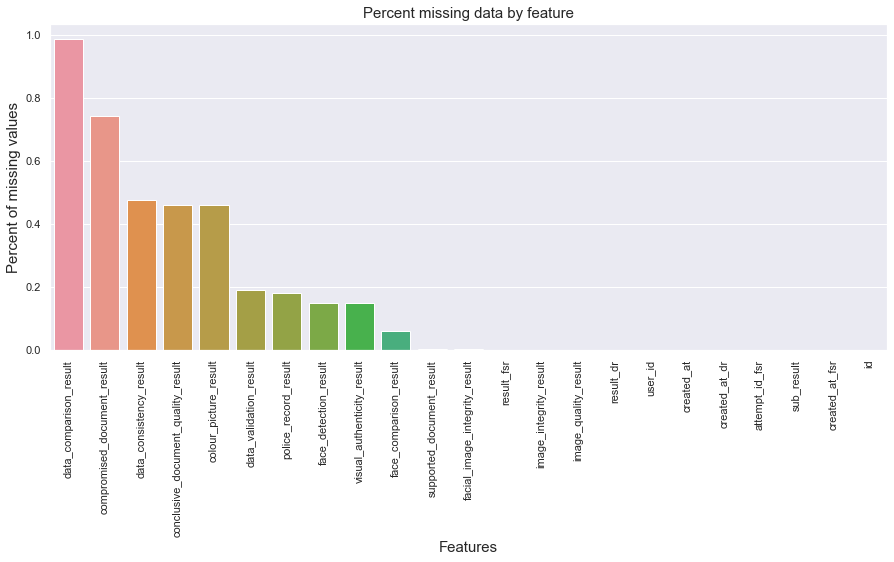

In [38]:
# Ploting all variables to check percentage 

total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

In [39]:
# Creating mask
clean = df.sub_result == 'clear'
no_clean = df.sub_result != 'clear'
# Creating new dataframes
clean_df = df[clean]
no_clean_df = df[no_clean]

,Total,Percent
data_comparison_result,130052,0.982251
compromised_document_result,98135,0.741190
conclusive_document_quality_result,53403,0.403340
colour_picture_result,53398,0.403302
data_consistency_result,51638,0.390009


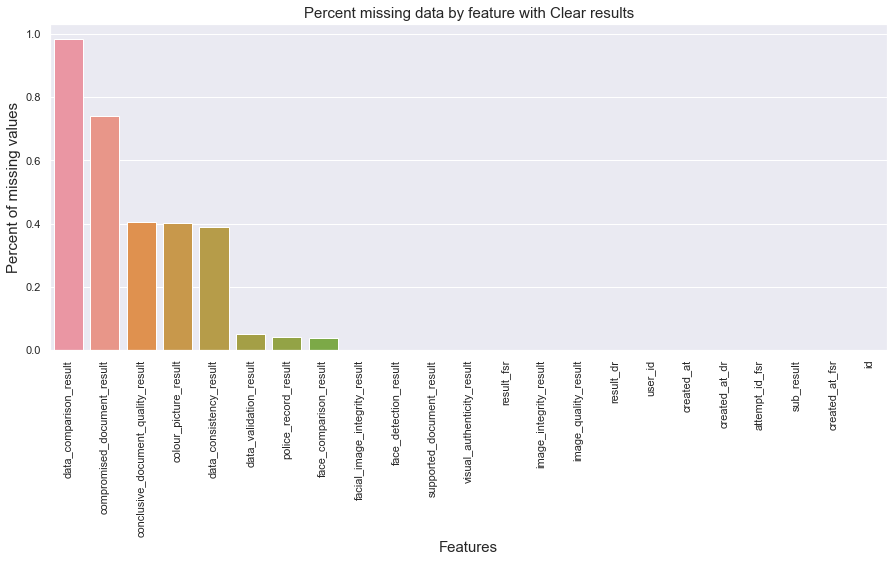

In [40]:
total = clean_df.isnull().sum().sort_values(ascending=False)
percent = (clean_df.isnull().sum()/clean_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature with Clear results', fontsize=15)
missing_data.head()

,Total,Percent
data_comparison_result,43804,0.995500
compromised_document_result,32763,0.744580
data_consistency_result,32537,0.739444
colour_picture_result,27784,0.631426
conclusive_document_quality_result,27784,0.631426


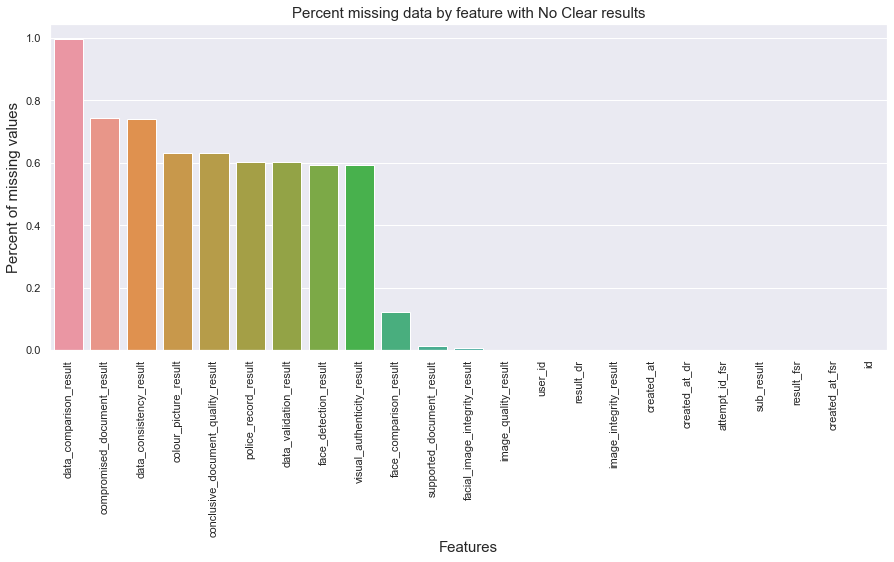

In [41]:
total = no_clean_df.isnull().sum().sort_values(ascending=False)
percent = (no_clean_df.isnull().sum()/no_clean_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature with No Clear results', fontsize=15)
missing_data.head()

Note: it seems that data_comparison_result and compromised_document_result have overall lots of missing values.These variables data_consistency_result, colour_picture_result and conclusive_document_quality_result have higher missing data for customer who does not pass the checks.

In [42]:
# Checking how sub_results and variables interact

no_clean_df.groupby('sub_result').agg({'result_fsr': 'value_counts',
                                       'result_dr': 'value_counts',
                                 'visual_authenticity_result' : 'value_counts', 
                                 'image_integrity_result': 'value_counts',
                                 'face_detection_result': 'value_counts',
                                 'image_quality_result': 'value_counts',
                                 'supported_document_result': 'value_counts',
                                 'conclusive_document_quality_result': 'value_counts',
                                 'colour_picture_result': 'value_counts',
                                 'data_validation_result': 'value_counts',
                                 'data_consistency_result': 'value_counts',
                                 'data_comparison_result': 'value_counts',
                                 'police_record_result': 'value_counts',
                                 'compromised_document_result': 'value_counts'}, min_count=1).fillna(0)


result_fsr  result_dr  visual_authenticity_result  \
caution   clear            14967.0        0.0                     14532.0   
          consider          1025.0    15992.0                      1438.0   
rejected  clear            21983.0        0.0                         0.0   
          consider          4107.0    26090.0                         0.0   
          unidentified         0.0        0.0                         0.0   
suspected clear             1646.0        0.0                       328.0   
          consider           274.0     1920.0                      1592.0   

                        image_integrity_result  face_detection_result  \
caution   clear                         2554.0                15417.0   
          consider                     13438.0                  550.0   
rejected  clear                            0.0                    0.0   
          consider                     26090.0                    0.0   
          unidentified                     0.0                    0.0   
suspected clear                         1705.0                 1896.0   
          consider                       215.0                   24.0   

                        image_quality_result  supported_document_result  \
caution   clear                      15992.0                    15992.0   
          consider                       0.0                        0.0   
rejected  clear                       1687.0                    23902.0   
          consider                       0.0                        0.0   
          unidentified               24403.0                     1687.0   
suspected clear                       1920.0                     1920.0   
          consider                       0.0                        0.0   

                        conclusive_document_quality_result  \
caution   clear                                     1123.0   
          consider                                 13386.0   
rejected  clear                                        0.0   
          consider                                     0.0   
          unidentified                                 0.0   
suspected clear                                     1530.0   
          consider                                   179.0   

                        colour_picture_result  data_validation_result  \
caution   clear                       14444.0                 14371.0   
          consider                       65.0                  1213.0   
rejected  clear                           0.0                     2.0   
          consider                        0.0                     1.0   
          unidentified                    0.0                     0.0   
suspected clear                        1670.0                  1460.0   
          consider                       39.0                   400.0   

                        data_consistency_result  data_comparison_result  \
caution   clear                          9858.0                    34.0   
          consider                          0.0                   162.0   
rejected  clear                             0.0                     0.0   
          consider                          0.0                     0.0   
          unidentified                      0.0                     0.0   
suspected clear                          1437.0                     2.0   
          consider                        170.0                     0.0   

                        police_record_result  compromised_document_result  
caution   clear                      15589.0                      10462.0  
          consider                       0.0                          0.0  
rejected  clear                          0.0                          3.0  
          consider                       0.0                          0.0  
          unidentified                   0.0                          0.0  
suspected clear                       1822.0                        751.0  
      

Note: huge rejected having a facial similarity result clear.

### Exploration

In [43]:
# Total number of clear customers over time
monthly_clear = clean_df.groupby(pd.Grouper(key = 'created_at_dr', freq = "M")).count().reset_index()
monthly_clear = monthly_clear[['created_at_dr', 'id']]
monthly_clear.head()
monthly_clear.sum()

id    132402
dtype: int64

In [44]:
# Total number of rejected customers over time
monthly_rejected = no_clean_df.groupby(pd.Grouper(key = 'created_at_dr', freq = "M")).count().reset_index()
monthly_rejected = monthly_rejected[['created_at_dr', 'id']]
monthly_rejected.head()
monthly_rejected.sum()

id    44002
dtype: int64

In [45]:
# Checking time range for kyz report
df.created_at_dr.min(), df.created_at_dr.max()

(Timestamp('2017-05-23 15:13:02+0000', tz='UTC'),
 Timestamp('2017-10-31 23:54:24+0000', tz='UTC'))

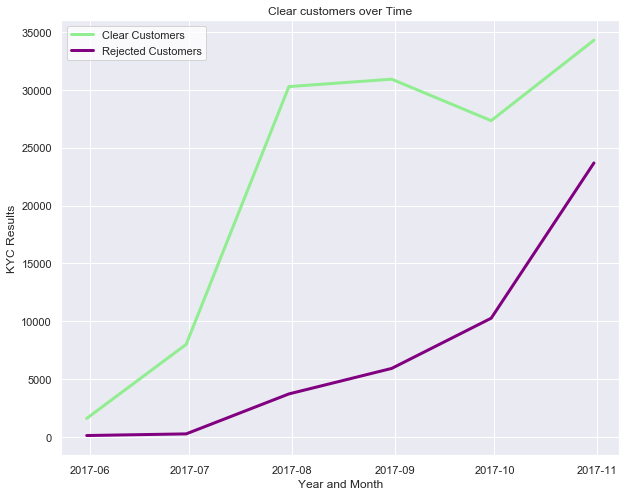

In [46]:
import warnings
warnings.filterwarnings("ignore")

# Plotting time vs. result customers

fig, ax = plt.subplots(figsize=(10,8))
sns.lineplot(x=monthly_clear.created_at_dr, 
             y=monthly_clear.id,
             color='lightgreen',
             ax=ax,
             linewidth=3)
sns.lineplot(x=monthly_rejected.created_at_dr, 
             y=monthly_rejected.id, 
             color='purple',
             ax=ax,
             linewidth=3)    
ax.legend(['Clear Customers', 'Rejected Customers'], facecolor='w')
ax.set_title('Clear customers over Time')
ax.set_xlabel('Year and Month')
ax.set_ylabel('KYC Results')
plt.show()

Note: July marked a high rise of Pass Customers, being steady in August and, during September, the Pass Customers decresed, afterwars it rise up again. On the other hand, Rejected Customer cases steadly increases since July, presenting a sharp increase in October. 

In [109]:
# Total Pass Rate
# Calculate the number of customers total customers

total = df['id'].nunique()

# Calculate the number of people who pass
pass_customers = df[df["sub_result"] == 'clear']\
                            ['id'].nunique()

# Calculate the pass rate
pass_rate = pass_customers/total
print("Total Pass Rate (%):  {}".format(round(pass_rate*100, 2)))

Total Pass Rate (%):  75.06


### Attempt count Assessment

In [48]:
attempts = df.groupby('user_id')['attempt_id_fsr'].count()

In [49]:
attempts.value_counts(), attempts.count()

(1    110374
 2     31118
 3      1145
 4        78
 5         7
 6         2
 Name: attempt_id_fsr, dtype: int64, 142724)

Note: Expecting only 2 attempts

In [50]:
# Saving results to merge with main df

attempts.to_csv('attempts_counts.csv')

In [52]:
attempts_df = pd.read_csv('attempts_counts.csv', names=['user_id', 'attempt_count'])

In [53]:
attempts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142724 entries, 0 to 142723
Data columns (total 2 columns):
user_id          142724 non-null object
attempt_count    142724 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.2+ MB


In [54]:
# Merging files

df_kyc = pd.merge(df, attempts_df, on = 'user_id', how = 'left')

#### Test

In [55]:
df_kyc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176404 entries, 0 to 176403
Data columns (total 24 columns):
id                                    176404 non-null int64
user_id                               176404 non-null object
result_dr                             176404 non-null object
visual_authenticity_result            150290 non-null object
image_integrity_result                176403 non-null object
face_detection_result                 150261 non-null object
image_quality_result                  176403 non-null object
created_at_dr                         176404 non-null datetime64[ns, UTC]
supported_document_result             175900 non-null object
conclusive_document_quality_result    95217 non-null object
colour_picture_result                 95222 non-null object
data_validation_result                142974 non-null object
data_consistency_result               92229 non-null object
data_comparison_result                2548 non-null object
police_record_result        

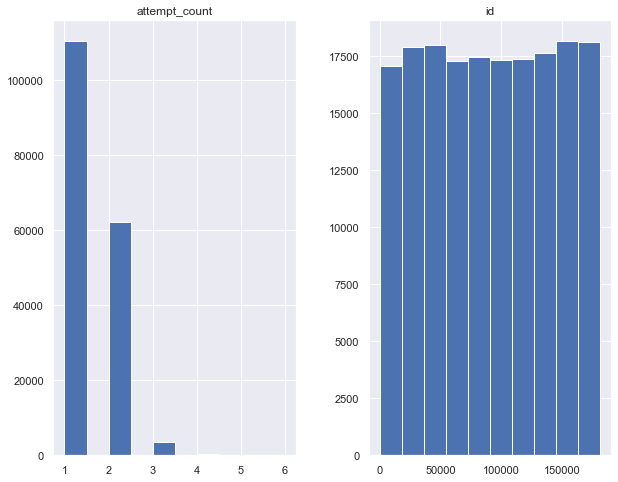

In [56]:
# Before starting to modify the data, let's look at the representation of the distribution of data
df_kyc.hist(figsize=(10,8));

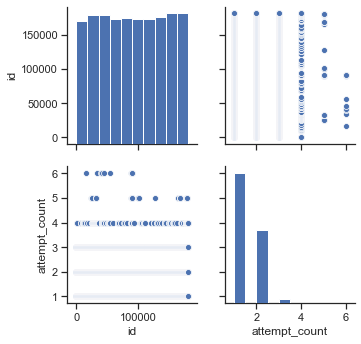

In [57]:
# Anaysing correlation between variables
sns.set(style="ticks", color_codes=True)
df_kyc_plot = sns.pairplot(df_kyc)

Note: Further transformation needed to analyse correlation between categorical variables.

In [58]:
# Save df

df_kyc.to_csv('df_kyc.csv')

In [59]:
# Attempts distribution per day

# Add random amount of float between [0.0:0.7) to input x
def jitter(x):
    random.seed()
    return x + random.uniform(0, 0.7)

In [60]:
# Return the number of days from a timedelta object x
def days_from_start(x):
    return x.days

# start date
first_day = df_kyc.created_at_dr.min()

# array with days corresponding to timestamp
df_kyc_days = (df_kyc.created_at_dr - first_day).apply(days_from_start)

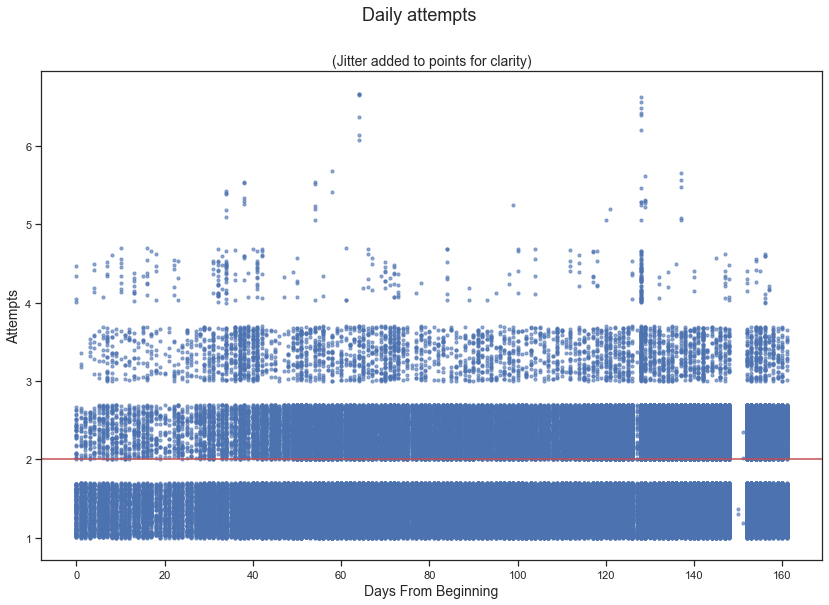

In [61]:
plt.figure(figsize = (14, 9))

# add jitter to the attempts so it's not so cluttered on each line
attempts_jitter = df_kyc.attempt_count.apply(jitter)

plt.scatter(df_kyc_days, attempts_jitter, s = 10, alpha = 0.6)

# title and labels
plt.suptitle('Daily attempts', fontsize = 18)
plt.title('(Jitter added to points for clarity)', fontsize = 14)

plt.xlabel('Days From Beginning', fontsize = 14)
plt.ylabel('Attempts', fontsize = 14)

# add the line at 2 for reference
plt.axhline(y = 2, color = 'r')

plt.show();

#### Clear/Not Clear assessment with variables

In [62]:
df_kyc['sub_result'].value_counts()

clear        132402
rejected      26090
caution       15992
suspected      1920
Name: sub_result, dtype: int64

In [63]:
# Creating mask
clear_r = df_kyc.sub_result == 'clear'
no_clear_r = df_kyc.sub_result != 'clear'
# Creating new dataframes
clear_df_kyc = df_kyc[clear_r]
no_clear_df_kyc = df_kyc[no_clear_r]

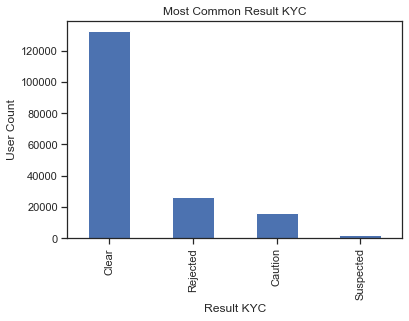

In [64]:
labels = ['Clear','Rejected','Caution', 'Suspected']
fig, ax = plt.subplots()
df_kyc.groupby(['sub_result']).user_id.count().sort_values(ascending=False).plot(kind='bar')

plt.xlabel('Result KYC')
ax.set_xticklabels(labels)
plt.ylabel('User Count')
plt.title('Most Common Result KYC');

### Monthly Count of Variables for Clear Customer

In [66]:
clear_df_kyc.groupby(pd.Grouper(key = 'created_at_dr', freq = "M")).agg({'result_fsr': 'value_counts',
                                       'result_dr': 'value_counts',
                                 'visual_authenticity_result' : 'value_counts', 
                                 'image_integrity_result': 'value_counts',
                                 'face_detection_result': 'value_counts',
                                 'image_quality_result': 'value_counts',
                                 'supported_document_result': 'value_counts',
                                 'conclusive_document_quality_result': 'value_counts',
                                 'colour_picture_result': 'value_counts',
                                 'data_validation_result': 'value_counts',
                                 'data_consistency_result': 'value_counts',
                                 'data_comparison_result': 'value_counts',
                                 'police_record_result': 'value_counts',
                                 'compromised_document_result': 'value_counts'}, min_count=1).fillna(0)

result_fsr  result_dr  \
2017-05-31 00:00:00+00:00 clear           1405     1608.0   
                          consider         203        0.0   
2017-06-30 00:00:00+00:00 clear           7581     8003.0   
                          consider         422        0.0   
2017-07-31 00:00:00+00:00 clear          28465    30272.0   
                          consider        1807        0.0   
2017-08-31 00:00:00+00:00 clear          29276    30911.0   
                          consider        1634        0.0   
2017-09-30 00:00:00+00:00 clear          26556    27329.0   
                          consider         773        0.0   
2017-10-31 00:00:00+00:00 clear          33607    34279.0   
                          consider         672        0.0   

                                    visual_authenticity_result  \
2017-05-31 00:00:00+00:00 clear                         1608.0   
                          consider                         0.0   
2017-06-30 00:00:00+00:00 clear                         8003.0   
                          consider                         0.0   
2017-07-31 00:00:00+00:00 clear                        30271.0   
                          consider                         0.0   
2017-08-31 00:00:00+00:00 clear                        30910.0   
                          consider                         0.0   
2017-09-30 00:00:00+00:00 clear                        27329.0   
                          consider                         0.0   
2017-10-31 00:00:00+00:00 clear                        34279.0   
                          consider                         0.0   

                                    image_integrity_result  \
2017-05-31 00:00:00+00:00 clear                     1608.0   
                          consider                     0.0   
2017-06-30 00:00:00+00:00 clear                     8003.0   
                          consider                     0.0   
2017-07-31 00:00:00+00:00 clear                    30271.0   
                          consider                     0.0   
2017-08-31 00:00:00+00:00 clear                    30911.0   
                          consider                     0.0   
2017-09-30 00:00:00+00:00 clear                    27329.0   
                          consider                     0.0   
2017-10-31 00:00:00+00:00 clear                    34279.0   
                          consider                     0.0   

                                    face_detection_result  \
2017-05-31 00:00:00+00:00 clear                    1608.0   
                          consider                    0.0   
2017-06-30 00:00:00+00:00 clear                    8002.0   
                          consider                    0.0   
2017-07-31 00:00:00+00:00 clear                   30267.0   
                          consider                    0.0   
2017-08-31 00:00:00+00:00 clear                   30905.0   
                          consider                    0.0   
2017-09-30 00:00:00+00:00 clear                   27322.0   
                          consider                    0.0   
2017-10-31 00:00:00+00:00 clear                   34270.0   
                          consider                    0.0   

                                    image_quality_result  \
2017-05-31 00:00:00+00:00 clear                   1608.0   
                          consider                   0.0   
2017-06-30 00:00:00+00:00 clear                   8003.0   
                          consider                   0.0   
2017-07-31 00:00:00+00:00 clear                  30271.0   
                          consider                   0.0   
2017-08-31 00:00:00+00:00 clear                  30911.0   
                          consider                   0.0   
2017-09-30 00:00:00+00:00 clear                  27329.0   
                          consider                   0.0   
2017-10-31 00:00:00+00:00 clear                  34279.0   
                          consider                   0.0   

 

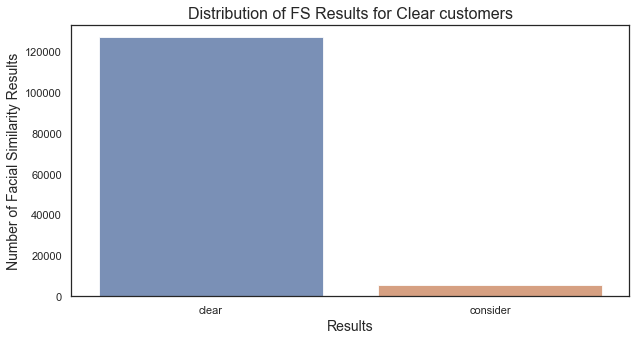

In [110]:
clear_df_kyc_rfsr = clear_df_kyc['result_fsr'].value_counts()
clear_df_kyc_rdr = clear_df_kyc['result_dr'].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(clear_df_kyc_rfsr.index, clear_df_kyc_rfsr.values, alpha=0.8)
plt.ylabel('Number of Facial Similarity Results', fontsize = 14)
plt.xlabel('Results', fontsize = 14)
plt.title('Distribution of FS Results for Clear customers', fontsize = 16)
plt.show();


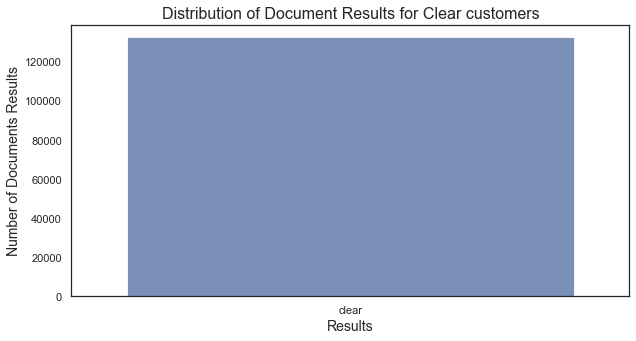

In [111]:
plt.figure(figsize=(10,5))
sns.barplot(clear_df_kyc_rdr.index, clear_df_kyc_rdr.values, alpha=0.8)
plt.ylabel('Number of Documents Results', fontsize = 14)
plt.xlabel('Results', fontsize = 14)
plt.title('Distribution of Document Results for Clear customers', fontsize = 16)
plt.show();

Note: Facial Similarity Results for Pass Results show consider cases

In [84]:
clear_df_kyc.groupby([pd.Grouper(key = 'created_at_dr', freq = "M"),'attempt_count']).agg({'result_fsr': 'value_counts',
                                       'result_dr': 'value_counts',
                                 'visual_authenticity_result' : 'value_counts', 
                                 'image_integrity_result': 'value_counts',
                                 'face_detection_result': 'value_counts',
                                 'image_quality_result': 'value_counts',
                                 'supported_document_result': 'value_counts',
                                 'conclusive_document_quality_result': 'value_counts',
                                 'colour_picture_result': 'value_counts',
                                 'data_validation_result': 'value_counts',
                                 'data_consistency_result': 'value_counts',
                                 'data_comparison_result': 'value_counts',
                                 'police_record_result': 'value_counts',
                                 'compromised_document_result': 'value_counts'}, min_count=1).fillna(0)

result_fsr  result_dr  \
2017-05-31 00:00:00+00:00 1 clear           1210     1336.0   
                            consider         126        0.0   
                          2 clear            168      222.0   
                            consider          54        0.0   
                          3 clear             22       37.0   
                            consider          15        0.0   
                          4 clear              5       13.0   
                            consider           8        0.0   
2017-06-30 00:00:00+00:00 1 clear           5949     6160.0   
                            consider         211        0.0   
                          2 clear           1194     1352.0   
                            consider         158        0.0   
                          3 clear            364      404.0   
                            consider          40        0.0   
                          4 clear             67       80.0   
                            consider          13        0.0   
                          5 clear              7        7.0   
2017-07-31 00:00:00+00:00 1 clear          23113    23388.0   
                            consider         275        0.0   
                          2 clear           4897     6343.0   
                            consider        1446        0.0   
                          3 clear            416      499.0   
                            consider          83        0.0   
                          4 clear             33       36.0   
                            consider           3        0.0   
                          5 clear              6        6.0   
2017-08-31 00:00:00+00:00 1 clear          24185    24391.0   
                            consider         205        0.0   
                          2 clear           4782     6144.0   
                            consider        1362        0.0   
                          3 clear            285      349.0   
                            consider          64        0.0   
                          4 clear             24       27.0   
                            consider           3        0.0   
2017-09-30 00:00:00+00:00 1 clear          22317    22415.0   
                            consider          98        0.0   
                          2 clear           3886     4525.0   
                            consider         639        0.0   
                          3 clear            284      320.0   
                            consider          36        0.0   
                          4 clear             51       51.0   
                          5 clear             12       12.0   
                          6 clear              6        6.0   
2017-10-31 00:00:00+00:00 1 clear          27358    27477.0   
                            consider         119        0.0   
                          2 clear           5979     6516.0   
                            consider         537        0.0   
                          3 clear            254      270.0   
                            consider          16        0.0   
                          4 clear             12       12.0   
                          5 clear              4        4.0   

                                      visual_authenticity_result  \
2017-05-31 00:00:00+00:00 1 clear                         1336.0   
                            consider                         0.0   
                          2 clear                          222.0   
                            consider                         0.0   
                          3 clear                           37.0   
                            consider                         0.0   
                          4 clear                           13.0   
                            consider                         0.0   
2017-06-30 00:00:00+00:00 1 clear                         6160.0   
                            consider                         0.0   
             

Note: Seems that it increases the number of consider and number of attempts.

In [85]:
clear_df_kyc.groupby([pd.Grouper(key = 'created_at_dr', freq = "M"),'attempt_count']).agg({'attempt_count': ['count'] }, min_count=1).fillna(0)


attempt_count
                                                count
created_at_dr             attempt_count              
2017-05-31 00:00:00+00:00 1                      1336
                          2                       222
                          3                        37
                          4                        13
2017-06-30 00:00:00+00:00 1                      6160
                          2                      1352
                          3                       404
                          4                        80
                          5                         7
2017-07-31 00:00:00+00:00 1                     23388
                          2                      6343
                          3                       499
                          4                        36
                          5                         6
2017-08-31 00:00:00+00:00 1                     24391
                          2                      6144
                          3                       349
                          4                        27
2017-09-30 00:00:00+00:00 1                     22415
                          2                      4525
                          3                       320
                          4                        51
                          5                        12
                          6                         6
2017-10-31 00:00:00+00:00 1                     27477
                          2                      6516
                          3                       270
                          4                        12
                          5                         4

### Monthly Count of Variables for No Clear Customer

In [86]:
no_clear_df_kyc.groupby([pd.Grouper(key = 'created_at_dr', freq = "M"),'sub_result']).agg({'result_fsr': 'value_counts',
                                       'result_dr': 'value_counts',
                                 'visual_authenticity_result' : 'value_counts', 
                                 'image_integrity_result': 'value_counts',
                                 'face_detection_result': 'value_counts',
                                 'image_quality_result': 'value_counts',
                                 'supported_document_result': 'value_counts',
                                 'conclusive_document_quality_result': 'value_counts',
                                 'colour_picture_result': 'value_counts',
                                 'data_validation_result': 'value_counts',
                                 'data_consistency_result': 'value_counts',
                                 'data_comparison_result': 'value_counts',
                                 'police_record_result': 'value_counts',
                                 'compromised_document_result': 'value_counts'}, min_count=1).fillna(0)


result_fsr  result_dr  \
2017-05-31 00:00:00+00:00 caution   clear              108.0        0.0   
                                    consider            21.0      129.0   
                          suspected clear                2.0        0.0   
                                    consider             0.0        2.0   
2017-06-30 00:00:00+00:00 caution   clear              208.0        0.0   
                                    consider            25.0      233.0   
                          rejected  clear               14.0        0.0   
                                    consider             0.0       14.0   
                                    unidentified         0.0        0.0   
                          suspected clear               26.0        0.0   
                                    consider             0.0       26.0   
2017-07-31 00:00:00+00:00 caution   clear              662.0        0.0   
                                    consider           125.0      787.0   
                          rejected  clear             2002.0        0.0   
                                    consider           784.0     2786.0   
                                    unidentified         0.0        0.0   
                          suspected clear              135.0        0.0   
                                    consider            18.0      153.0   
2017-08-31 00:00:00+00:00 caution   clear              612.0        0.0   
                                    consider           222.0      834.0   
                          rejected  clear             3531.0        0.0   
                                    consider          1172.0     4703.0   
                                    unidentified         0.0        0.0   
                          suspected clear              314.0        0.0   
                                    consider            78.0      392.0   
2017-09-30 00:00:00+00:00 caution   clear             3000.0        0.0   
                                    consider           312.0     3312.0   
                          rejected  clear             5362.0        0.0   
                                    consider          1009.0     6371.0   
                                    unidentified         0.0        0.0   
                          suspected clear              498.0        0.0   
                                    consider            84.0      582.0   
2017-10-31 00:00:00+00:00 caution   clear            10377.0        0.0   
                                    consider           320.0    10697.0   
                          rejected  clear            11074.0        0.0   
                                    consider          1142.0    12216.0   
                                    unidentified         0.0        0.0   
                          suspected clear              671.0        0.0   
                                    consider            94.0      765.0   

                                                  visual_authenticity_result  \
2017-05-31 00:00:00+00:00 caution   clear                              114.0   
                                    consider                            15.0   
                          suspected clear                                2.0   
                                    consider                             0.0   
2017-06-30 00:00:00+00:00 caution   clear                              115.0   
                                    consider                           118.0   
                          rejected  clear                                0.0   
                                    consider                             0.0   
                                    unidentified                         0.0   
                          suspected clear                               13.0   
                                    consider                            13.0   
2017-07-31 00:00:00+00:00 caution   clear                              281.0   
         

Note: Further analysis to understand sub_result

In [87]:
# Creating mask
rejected = no_clear_df_kyc.sub_result == 'rejected'
caution = no_clear_df_kyc.sub_result == 'caution'
suspected = no_clear_df_kyc.sub_result == 'suspected'
# Creating new dataframes
rejected_df = no_clear_df_kyc[rejected]
caution_df = no_clear_df_kyc[caution]
suspected_df = no_clear_df_kyc[suspected]

In [88]:
rejected_df.groupby(pd.Grouper(key = 'created_at_dr', freq = "M")).agg({'result_fsr': 'value_counts',
                                       'result_dr': 'value_counts',
                                 'visual_authenticity_result' : 'value_counts', 
                                 'image_integrity_result': 'value_counts',
                                 'face_detection_result': 'value_counts',
                                 'image_quality_result': 'value_counts',
                                 'supported_document_result': 'value_counts',
                                 'conclusive_document_quality_result': 'value_counts',
                                 'colour_picture_result': 'value_counts',
                                 'data_validation_result': 'value_counts',
                                 'data_consistency_result': 'value_counts',
                                 'data_comparison_result': 'value_counts',
                                 'police_record_result': 'value_counts',
                                 'compromised_document_result': 'value_counts'}, min_count=1).fillna(0)

result_fsr  result_dr  \
2017-06-30 00:00:00+00:00 clear               14.0        0.0   
                          consider             0.0       14.0   
                          unidentified         0.0        0.0   
2017-07-31 00:00:00+00:00 clear             2002.0        0.0   
                          consider           784.0     2786.0   
                          unidentified         0.0        0.0   
2017-08-31 00:00:00+00:00 clear             3531.0        0.0   
                          consider          1172.0     4703.0   
                          unidentified         0.0        0.0   
2017-09-30 00:00:00+00:00 clear             5362.0        0.0   
                          consider          1009.0     6371.0   
                          unidentified         0.0        0.0   
2017-10-31 00:00:00+00:00 clear            11074.0        0.0   
                          consider          1142.0    12216.0   
                          unidentified         0.0        0.0   

                                        visual_authenticity_result  \
2017-06-30 00:00:00+00:00 clear                                0.0   
                          consider                             0.0   
                          unidentified                         0.0   
2017-07-31 00:00:00+00:00 clear                                0.0   
                          consider                             0.0   
                          unidentified                         0.0   
2017-08-31 00:00:00+00:00 clear                                0.0   
                          consider                             0.0   
                          unidentified                         0.0   
2017-09-30 00:00:00+00:00 clear                                0.0   
                          consider                             0.0   
                          unidentified                         0.0   
2017-10-31 00:00:00+00:00 clear                                0.0   
                          consider                             0.0   
                          unidentified                         0.0   

                                        image_integrity_result  \
2017-06-30 00:00:00+00:00 clear                            0.0   
                          consider                        14.0   
                          unidentified                     0.0   
2017-07-31 00:00:00+00:00 clear                            0.0   
                          consider                      2786.0   
                          unidentified                     0.0   
2017-08-31 00:00:00+00:00 clear                            0.0   
                          consider                      4703.0   
                          unidentified                     0.0   
2017-09-30 00:00:00+00:00 clear                            0.0   
                          consider                      6371.0   
                          unidentified                     0.0   
2017-10-31 00:00:00+00:00 clear                            0.0   
                          consider                     12216.0   
                          unidentified                     0.0   

                                        face_detection_result  \
2017-06-30 00:00:00+00:00 clear                           0.0   
                          consider                        0.0   
                          unidentified                    0.0   
2017-07-31 00:00:00+00:00 clear                           0.0   
                          consider                        0.0   
                          unidentified                    0.0   
2017-08-31 00:00:00+00:00 clear                           0.0   
                          consider                        0.0   
                          unidentified                    0.0   
2017-09-30 00:00:00+00:00 clear                           0.0   
                          consider                        0.0   
                          unidentified   

In [89]:
rejected_df.groupby([pd.Grouper(key = 'created_at_dr', freq = "M"),'attempt_count']).agg({'result_fsr': 'value_counts',
                                       'result_dr': 'value_counts',
                                 'visual_authenticity_result' : 'value_counts', 
                                 'image_integrity_result': 'value_counts',
                                 'face_detection_result': 'value_counts',
                                 'image_quality_result': 'value_counts',
                                 'supported_document_result': 'value_counts',
                                 'conclusive_document_quality_result': 'value_counts',
                                 'colour_picture_result': 'value_counts',
                                 'data_validation_result': 'value_counts',
                                 'data_consistency_result': 'value_counts',
                                 'data_comparison_result': 'value_counts',
                                 'police_record_result': 'value_counts',
                                 'compromised_document_result': 'value_counts'}, min_count=1).fillna(0)

result_fsr  result_dr  \
2017-06-30 00:00:00+00:00 1 clear               12.0        0.0   
                            consider             0.0       12.0   
                            unidentified         0.0        0.0   
                          2 clear                2.0        0.0   
                            consider             0.0        2.0   
...                                              ...        ...   
2017-10-31 00:00:00+00:00 4 consider             0.0       11.0   
                            unidentified         0.0        0.0   
                          5 clear                1.0        0.0   
                            consider             0.0        1.0   
                            unidentified         0.0        0.0   

                                          visual_authenticity_result  \
2017-06-30 00:00:00+00:00 1 clear                                0.0   
                            consider                             0.0   
                            unidentified                         0.0   
                          2 clear                                0.0   
                            consider                             0.0   
...                                                              ...   
2017-10-31 00:00:00+00:00 4 consider                             0.0   
                            unidentified                         0.0   
                          5 clear                                0.0   
                            consider                             0.0   
                            unidentified                         0.0   

                                          image_integrity_result  \
2017-06-30 00:00:00+00:00 1 clear                            0.0   
                            consider                        12.0   
                            unidentified                     0.0   
                          2 clear                            0.0   
                            consider                         2.0   
...                                                          ...   
2017-10-31 00:00:00+00:00 4 consider                        11.0   
                            unidentified                     0.0   
                          5 clear                            0.0   
                            consider                         1.0   
                            unidentified                     0.0   

                                          face_detection_result  \
2017-06-30 00:00:00+00:00 1 clear                           0.0   
                            consider                        0.0   
                            unidentified                    0.0   
                          2 clear                           0.0   
                            consider                        0.0   
...                                                         ...   
2017-10-31 00:00:00+00:00 4 consider                        0.0   
                            unidentified                    0.0   
                          5 clear                           0.0   
                            consider                        0.0   
                            unidentified                    0.0   

                                          image_quality_result  \
2017-06-30 00:00:00+00:00 1 clear                          7.0   
                            consider                       0.0   
                            unidentified                   5.0   
                          2 clear                          2.0   
                            consider                       0.0   
...                                                        ...   
2017-10-31 00:00:00+00:00 4 consider                       0.0   
                            unidentified                  11.0   
                          5 clear                          0.0   
                            consider                       0.0   
                        

In [90]:
rejected_df.groupby([pd.Grouper(key = 'created_at_dr', freq = "M"),'attempt_count']).agg({'attempt_count': ['count'] }, min_count=1).fillna(0)


attempt_count
                                                count
created_at_dr             attempt_count              
2017-06-30 00:00:00+00:00 1                        12
                          2                         2
2017-07-31 00:00:00+00:00 1                       281
                          2                      2389
                          3                       106
                          4                         6
                          5                         4
2017-08-31 00:00:00+00:00 1                       335
                          2                      4204
                          3                       160
                          4                         3
                          5                         1
2017-09-30 00:00:00+00:00 1                       486
                          2                      5638
                          3                       235
                          4                        12
2017-10-31 00:00:00+00:00 1                      1051
                          2                     10776
                          3                       377
                          4                        11
                          5                         1

Note: No more than 5 attempts for rejection. Seems that FS results show clear for rejected customers and really few variables with input. Unidentified cases present.

In [91]:
caution_df.groupby(pd.Grouper(key = 'created_at_dr', freq = "M")).agg({'result_fsr': 'value_counts',
                                       'result_dr': 'value_counts',
                                 'visual_authenticity_result' : 'value_counts', 
                                 'image_integrity_result': 'value_counts',
                                 'face_detection_result': 'value_counts',
                                 'image_quality_result': 'value_counts',
                                 'supported_document_result': 'value_counts',
                                 'conclusive_document_quality_result': 'value_counts',
                                 'colour_picture_result': 'value_counts',
                                 'data_validation_result': 'value_counts',
                                 'data_consistency_result': 'value_counts',
                                 'data_comparison_result': 'value_counts',
                                 'police_record_result': 'value_counts',
                                 'compromised_document_result': 'value_counts'}, min_count=1).fillna(0)

result_fsr  result_dr  \
2017-05-31 00:00:00+00:00 clear            108        0.0   
                          consider          21      129.0   
2017-06-30 00:00:00+00:00 clear            208        0.0   
                          consider          25      233.0   
2017-07-31 00:00:00+00:00 clear            662        0.0   
                          consider         125      787.0   
2017-08-31 00:00:00+00:00 clear            612        0.0   
                          consider         222      834.0   
2017-09-30 00:00:00+00:00 clear           3000        0.0   
                          consider         312     3312.0   
2017-10-31 00:00:00+00:00 clear          10377        0.0   
                          consider         320    10697.0   

                                    visual_authenticity_result  \
2017-05-31 00:00:00+00:00 clear                            114   
                          consider                          15   
2017-06-30 00:00:00+00:00 clear                            115   
                          consider                         118   
2017-07-31 00:00:00+00:00 clear                            281   
                          consider                         484   
2017-08-31 00:00:00+00:00 clear                            404   
                          consider                         430   
2017-09-30 00:00:00+00:00 clear                           3077   
                          consider                         235   
2017-10-31 00:00:00+00:00 clear                          10541   
                          consider                         156   

                                    image_integrity_result  \
2017-05-31 00:00:00+00:00 clear                      129.0   
                          consider                     0.0   
2017-06-30 00:00:00+00:00 clear                      233.0   
                          consider                     0.0   
2017-07-31 00:00:00+00:00 clear                      787.0   
                          consider                     0.0   
2017-08-31 00:00:00+00:00 clear                      638.0   
                          consider                   196.0   
2017-09-30 00:00:00+00:00 clear                      369.0   
                          consider                  2943.0   
2017-10-31 00:00:00+00:00 clear                      398.0   
                          consider                 10299.0   

                                    face_detection_result  \
2017-05-31 00:00:00+00:00 clear                     129.0   
                          consider                    0.0   
2017-06-30 00:00:00+00:00 clear                     227.0   
                          consider                    6.0   
2017-07-31 00:00:00+00:00 clear                     752.0   
                          consider                   13.0   
2017-08-31 00:00:00+00:00 clear                     643.0   
                          consider                  191.0   
2017-09-30 00:00:00+00:00 clear                    3098.0   
                          consider                  214.0   
2017-10-31 00:00:00+00:00 clear                   10568.0   
                          consider                  126.0   

                                    image_quality_result  \
2017-05-31 00:00:00+00:00 clear                    129.0   
                          consider                   0.0   
2017-06-30 00:00:00+00:00 clear                    233.0   
                          consider                   0.0   
2017-07-31 00:00:00+00:00 clear                    787.0   
                          consider                   0.0   
2017-08-31 00:00:00+00:00 clear                    834.0   
                          consider                   0.0   
2017-09-30 00:00:00+00:00 clear                   3312.0   
                          consider                   0.0   
2017-10-31 00:00:00+00:00 clear                  10697.0   
                          consider                   0.0   

 

In [92]:
caution_df.groupby([pd.Grouper(key = 'created_at_dr', freq = "M"),'attempt_count']).agg({'result_fsr': 'value_counts',
                                       'result_dr': 'value_counts',
                                 'visual_authenticity_result' : 'value_counts', 
                                 'image_integrity_result': 'value_counts',
                                 'face_detection_result': 'value_counts',
                                 'image_quality_result': 'value_counts',
                                 'supported_document_result': 'value_counts',
                                 'conclusive_document_quality_result': 'value_counts',
                                 'colour_picture_result': 'value_counts',
                                 'data_validation_result': 'value_counts',
                                 'data_consistency_result': 'value_counts',
                                 'data_comparison_result': 'value_counts',
                                 'police_record_result': 'value_counts',
                                 'compromised_document_result': 'value_counts'}, min_count=1).fillna(0)

result_fsr  result_dr  \
2017-05-31 00:00:00+00:00 1 clear           65.0        0.0   
                            consider        15.0       80.0   
                          2 clear           30.0        0.0   
                            consider         3.0       33.0   
                          3 clear           13.0        0.0   
                            consider         3.0       16.0   
2017-06-30 00:00:00+00:00 1 clear           86.0        0.0   
                            consider        16.0      102.0   
                          2 clear           80.0        0.0   
                            consider         5.0       85.0   
                          3 clear           34.0        0.0   
                            consider         4.0       38.0   
                          4 clear            8.0        0.0   
                            consider         0.0        8.0   
2017-07-31 00:00:00+00:00 1 clear           96.0        0.0   
                            consider        23.0      119.0   
                          2 clear          509.0        0.0   
                            consider        92.0      601.0   
                          3 clear           48.0        0.0   
                            consider        10.0       58.0   
                          4 clear            3.0        0.0   
                            consider         0.0        3.0   
                          6 clear            6.0        0.0   
                            consider         0.0        6.0   
2017-08-31 00:00:00+00:00 1 clear           76.0        0.0   
                            consider        26.0      102.0   
                          2 clear          498.0        0.0   
                            consider       187.0      685.0   
                          3 clear           32.0        0.0   
                            consider         9.0       41.0   
                          4 clear            6.0        0.0   
                            consider         0.0        6.0   
2017-09-30 00:00:00+00:00 1 clear          452.0        0.0   
                            consider        46.0      498.0   
                          2 clear         2393.0        0.0   
                            consider       252.0     2645.0   
                          3 clear          138.0        0.0   
                            consider        14.0      152.0   
                          4 clear           17.0        0.0   
                            consider         0.0       17.0   
2017-10-31 00:00:00+00:00 1 clear         1710.0        0.0   
                            consider        43.0     1753.0   
                          2 clear         8410.0        0.0   
                            consider       263.0     8673.0   
                          3 clear          244.0        0.0   
                            consider        14.0      258.0   
                          4 clear           13.0        0.0   
                            consider         0.0       13.0   

                                      visual_authenticity_result  \
2017-05-31 00:00:00+00:00 1 clear                           68.0   
                            consider                        12.0   
                          2 clear                           30.0   
                            consider                         3.0   
                          3 clear                           16.0   
                            consider                         0.0   
2017-06-30 00:00:00+00:00 1 clear                           53.0   
                            consider                        49.0   
                          2 clear                           36.0   
                            consider                        49.0   
                          3 clear                           18.0   
                            consider                        20.0   
                          4 clear                            8.0  

In [93]:
caution_df.groupby([pd.Grouper(key = 'created_at_dr', freq = "M"),'attempt_count']).agg({'attempt_count': ['count'] }, min_count=1).fillna(0)


attempt_count
                                                count
created_at_dr             attempt_count              
2017-05-31 00:00:00+00:00 1                        80
                          2                        33
                          3                        16
2017-06-30 00:00:00+00:00 1                       102
                          2                        85
                          3                        38
                          4                         8
2017-07-31 00:00:00+00:00 1                       119
                          2                       601
                          3                        58
                          4                         3
                          6                         6
2017-08-31 00:00:00+00:00 1                       102
                          2                       685
                          3                        41
                          4                         6
2017-09-30 00:00:00+00:00 1                       498
                          2                      2645
                          3                       152
                          4                        17
2017-10-31 00:00:00+00:00 1                      1753
                          2                      8673
                          3                       258
                          4                        13

Note: data_comparison_result seems to stopped providing values from July, on the other way, the data increases in the other variables. Finally, the amount of doc results and facial similarity count increases both for clear and consider in the last month.

In [94]:
suspected_df.groupby(pd.Grouper(key = 'created_at_dr', freq = "M")).agg({'result_fsr': 'value_counts',
                                       'result_dr': 'value_counts',
                                 'visual_authenticity_result' : 'value_counts', 
                                 'image_integrity_result': 'value_counts',
                                 'face_detection_result': 'value_counts',
                                 'image_quality_result': 'value_counts',
                                 'supported_document_result': 'value_counts',
                                 'conclusive_document_quality_result': 'value_counts',
                                 'colour_picture_result': 'value_counts',
                                 'data_validation_result': 'value_counts',
                                 'data_consistency_result': 'value_counts',
                                 'data_comparison_result': 'value_counts',
                                 'police_record_result': 'value_counts',
                                 'compromised_document_result': 'value_counts'}, min_count=1).fillna(0)

result_fsr  result_dr  \
2017-05-31 00:00:00+00:00 clear            2.0        0.0   
                          consider         0.0        2.0   
2017-06-30 00:00:00+00:00 clear           26.0        0.0   
                          consider         0.0       26.0   
2017-07-31 00:00:00+00:00 clear          135.0        0.0   
                          consider        18.0      153.0   
2017-08-31 00:00:00+00:00 clear          314.0        0.0   
                          consider        78.0      392.0   
2017-09-30 00:00:00+00:00 clear          498.0        0.0   
                          consider        84.0      582.0   
2017-10-31 00:00:00+00:00 clear          671.0        0.0   
                          consider        94.0      765.0   

                                    visual_authenticity_result  \
2017-05-31 00:00:00+00:00 clear                            2.0   
                          consider                         0.0   
2017-06-30 00:00:00+00:00 clear                           13.0   
                          consider                        13.0   
2017-07-31 00:00:00+00:00 clear                           46.0   
                          consider                       107.0   
2017-08-31 00:00:00+00:00 clear                           44.0   
                          consider                       348.0   
2017-09-30 00:00:00+00:00 clear                           95.0   
                          consider                       487.0   
2017-10-31 00:00:00+00:00 clear                          128.0   
                          consider                       637.0   

                                    image_integrity_result  \
2017-05-31 00:00:00+00:00 clear                        2.0   
                          consider                     0.0   
2017-06-30 00:00:00+00:00 clear                       26.0   
                          consider                     0.0   
2017-07-31 00:00:00+00:00 clear                      153.0   
                          consider                     0.0   
2017-08-31 00:00:00+00:00 clear                      379.0   
                          consider                    13.0   
2017-09-30 00:00:00+00:00 clear                      514.0   
                          consider                    68.0   
2017-10-31 00:00:00+00:00 clear                      631.0   
                          consider                   134.0   

                                    face_detection_result  \
2017-05-31 00:00:00+00:00 clear                       2.0   
                          consider                    0.0   
2017-06-30 00:00:00+00:00 clear                      26.0   
                          consider                    0.0   
2017-07-31 00:00:00+00:00 clear                     143.0   
                          consider                   10.0   
2017-08-31 00:00:00+00:00 clear                     385.0   
                          consider                    7.0   
2017-09-30 00:00:00+00:00 clear                     576.0   
                          consider                    6.0   
2017-10-31 00:00:00+00:00 clear                     764.0   
                          consider                    1.0   

                                    image_quality_result  \
2017-05-31 00:00:00+00:00 clear                      2.0   
                          consider                   0.0   
2017-06-30 00:00:00+00:00 clear                     26.0   
                          consider                   0.0   
2017-07-31 00:00:00+00:00 clear                    153.0   
                          consider                   0.0   
2017-08-31 00:00:00+00:00 clear                    392.0   
                          consider                   0.0   
2017-09-30 00:00:00+00:00 clear                    582.0   
                          consider                   0.0   
2017-10-31 00:00:00+00:00 clear                    765.0   
                          consider                   0.0   

 

In [95]:
suspected_df.groupby([pd.Grouper(key = 'created_at_dr', freq = "M"),'attempt_count']).agg({'result_fsr': 'value_counts',
                                       'result_dr': 'value_counts',
                                 'visual_authenticity_result' : 'value_counts', 
                                 'image_integrity_result': 'value_counts',
                                 'face_detection_result': 'value_counts',
                                 'image_quality_result': 'value_counts',
                                 'supported_document_result': 'value_counts',
                                 'conclusive_document_quality_result': 'value_counts',
                                 'colour_picture_result': 'value_counts',
                                 'data_validation_result': 'value_counts',
                                 'data_consistency_result': 'value_counts',
                                 'data_comparison_result': 'value_counts',
                                 'police_record_result': 'value_counts',
                                 'compromised_document_result': 'value_counts'}, min_count=1).fillna(0)

result_fsr  result_dr  \
2017-05-31 00:00:00+00:00 2 clear            2.0        0.0   
                            consider         0.0        2.0   
2017-06-30 00:00:00+00:00 1 clear           11.0        0.0   
                            consider         0.0       11.0   
                          2 clear            9.0        0.0   
                            consider         0.0        9.0   
                          3 clear            2.0        0.0   
                            consider         0.0        2.0   
                          4 clear            4.0        0.0   
                            consider         0.0        4.0   
2017-07-31 00:00:00+00:00 1 clear           21.0        0.0   
                            consider         5.0       26.0   
                          2 clear           98.0        0.0   
                            consider        11.0      109.0   
                          3 clear           16.0        0.0   
                            consider         2.0       18.0   
2017-08-31 00:00:00+00:00 1 clear           53.0        0.0   
                            consider        13.0       66.0   
                          2 clear          229.0        0.0   
                            consider        60.0      289.0   
                          3 clear           32.0        0.0   
                            consider         5.0       37.0   
2017-09-30 00:00:00+00:00 1 clear           88.0        0.0   
                            consider        29.0      117.0   
                          2 clear          381.0        0.0   
                            consider        51.0      432.0   
                          3 clear           25.0        0.0   
                            consider         2.0       27.0   
                          4 clear            4.0        0.0   
                            consider         2.0        6.0   
2017-10-31 00:00:00+00:00 1 clear          141.0        0.0   
                            consider        27.0      168.0   
                          2 clear          500.0        0.0   
                            consider        62.0      562.0   
                          3 clear           26.0        0.0   
                            consider         5.0       31.0   
                          4 clear            4.0        0.0   
                            consider         0.0        4.0   

                                      visual_authenticity_result  \
2017-05-31 00:00:00+00:00 2 clear                            2.0   
                            consider                         0.0   
2017-06-30 00:00:00+00:00 1 clear                            8.0   
                            consider                         3.0   
                          2 clear                            5.0   
                            consider                         4.0   
                          3 clear                            0.0   
                            consider                         2.0   
                          4 clear                            0.0   
                            consider                         4.0   
2017-07-31 00:00:00+00:00 1 clear                            7.0   
                            consider                        19.0   
                          2 clear                           34.0   
                            consider                        75.0   
                          3 clear                            5.0   
                            consider                        13.0   
2017-08-31 00:00:00+00:00 1 clear                            7.0   
                            consider                        59.0   
                          2 clear                           36.0   
                            consider                       253.0   
                          3 clear                            1.0   
                            consider                        36.0   
2017-09-30 00:00

In [96]:
suspected_df.groupby([pd.Grouper(key = 'created_at_dr', freq = "M"),'attempt_count']).agg({
    'attempt_count': ['count'] }, min_count=1).fillna(0)


attempt_count
                                                count
created_at_dr             attempt_count              
2017-05-31 00:00:00+00:00 2                         2
2017-06-30 00:00:00+00:00 1                        11
                          2                         9
                          3                         2
                          4                         4
2017-07-31 00:00:00+00:00 1                        26
                          2                       109
                          3                        18
2017-08-31 00:00:00+00:00 1                        66
                          2                       289
                          3                        37
2017-09-30 00:00:00+00:00 1                       117
                          2                       432
                          3                        27
                          4                         6
2017-10-31 00:00:00+00:00 1                       168
                          2                       562
                          3                        31
                          4                         4

Note: Overall, similar behaviour than Caution.

## Correlation

To analyse categorical variables, I need to transform the values to 1/0. For time wise reason, the data wrangling for this part is done in Excel, where I also do the last part of the analysis.

Explanation:
- 1 = 'clear'
- 0 = 'unidentified', 'consider'
- Null left as Null

In [4]:
# Load categoriaval variables data

cat_var = pd.read_csv('categorical_variables.csv')
cat_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176404 entries, 0 to 176403
Data columns (total 20 columns):
id                                    176404 non-null int64
created_at_dr                         176404 non-null object
sub_result_cat                        176404 non-null int64
attempt_count                         176404 non-null int64
result_dr                             176404 non-null int64
visual_authenticity_result            150290 non-null float64
image_integrity_result                176403 non-null float64
face_detection_result                 150261 non-null float64
image_quality_result                  176403 non-null float64
supported_document_result             175900 non-null float64
conclusive_document_quality_result    95217 non-null float64
colour_picture_result                 95222 non-null float64
data_validation_result                142974 non-null float64
data_consistency_result               92229 non-null float64
data_comparison_result           

In [98]:
# change format created_at
cat_var['created_at_dr'] = pd.to_datetime(cat_var.created_at_dr)
cat_var['created_at'] = cat_var.created_at_dr.dt.floor('s')

In [99]:
cat_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176404 entries, 0 to 176403
Data columns (total 21 columns):
id                                    176404 non-null int64
created_at_dr                         176404 non-null datetime64[ns, UTC]
sub_result_cat                        176404 non-null int64
attempt_count                         176404 non-null int64
result_dr                             176404 non-null int64
visual_authenticity_result            150290 non-null float64
image_integrity_result                176403 non-null float64
face_detection_result                 150261 non-null float64
image_quality_result                  176403 non-null float64
supported_document_result             175900 non-null float64
conclusive_document_quality_result    95217 non-null float64
colour_picture_result                 95222 non-null float64
data_validation_result                142974 non-null float64
data_consistency_result               92229 non-null float64
data_comparison_resu

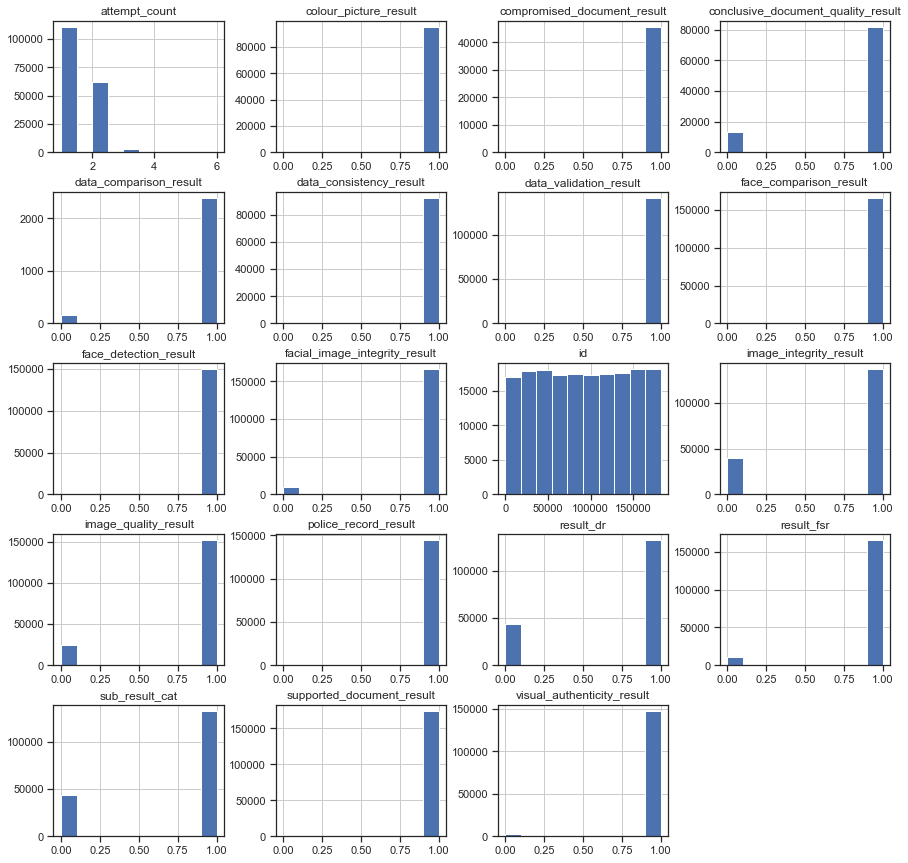

In [101]:
# Before starting to modify the data, let's look at the representation of the distribution of data
cat_var.hist(figsize=(15,15));

Note: Overal, the are more clear for all results, as expected.

In [102]:
cat_var.sub_result_cat.value_counts()

1    132402
0     44002
Name: sub_result_cat, dtype: int64

In [103]:
# Matrix of correlation

corr = cat_var.corr()
corr

,id,sub_result_cat,attempt_count,result_dr,visual_authenticity_result,image_integrity_result,face_detection_result,image_quality_result,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,police_record_result,compromised_document_result,result_fsr,face_comparison_result,facial_image_integrity_result
id,1.000000,0.157207,-0.078400,0.157207,-0.010325,0.165862,-0.008425,0.074091,-0.012343,0.194911,-0.001202,0.004118,-0.012211,0.038424,0.000808,-0.000753,-0.040537,0.016714,-0.053633
sub_result_cat,0.157207,1.000000,-0.558153,1.000000,0.390227,0.935447,0.168460,0.695039,0.171676,0.899578,0.072981,0.283832,0.114055,0.897684,0.035512,0.039266,0.145878,-0.006277,0.145421
attempt_count,-0.078400,-0.558153,1.000000,-0.558153,-0.164775,-0.526281,-0.073849,-0.414558,-0.089875,-0.450563,-0.027100,-0.122013,-0.049243,-0.180791,-0.013036,-0.026515,-0.232994,-0.036126,-0.227560
result_dr,0.157207,1.000000,-0.558153,1.000000,0.390227,0.935447,0.168460,0.695039,0.171676,0.899578,0.072981,0.283832,0.114055,0.897684,0.035512,0.039266,0.145878,-0.006277,0.145421
visual_authenticity_result,-0.010325,0.390227,-0.164775,0.390227,1.000000,0.006711,0.431660,NaN,NaN,-0.013129,0.223199,0.083777,0.120283,-0.005963,0.016716,0.004405,0.161617,0.008935,0.151763
image_integrity_result,0.165862,0.935447,-0.526281,0.935447,0.006711,1.000000,0.010833,0.743002,0.183637,0.996235,0.080823,-0.001087,-0.005879,NaN,0.003024,-0.000376,0.119411,-0.010471,0.122108
face_detection_result,-0.008425,0.168460,-0.073849,0.168460,0.431660,0.010833,1.000000,NaN,NaN,0.000255,0.010163,0.000728,0.041554,NaN,-0.000817,-0.001236,0.211786,0.002143,0.225222
image_quality_result,0.074091,0.695039,-0.414558,0.695039,NaN,0.743002,NaN,1.000000,-0.039023,NaN,NaN,-0.000403,NaN,NaN,NaN,-0.000183,0.154877,-0.004562,0.159037
supported_document_result,-0.012343,0.171676,-0.089875,0.171676,NaN,0.183637,NaN,-0.039023,1.000000,NaN,NaN,0.024559,NaN,NaN,NaN,NaN,0.054647,0.004381,0.055823
conclusive_document_quality_result,0.194911,0.899578,-0.450563,0.899578,-0.013129,0.996235,0.000255,NaN,NaN,1.000000,0.001077,0.000128,-0.006385,NaN,0.003066,-0.000336,-0.002755,-0.002620,-0.005654


In [104]:
sns.set(style="white")

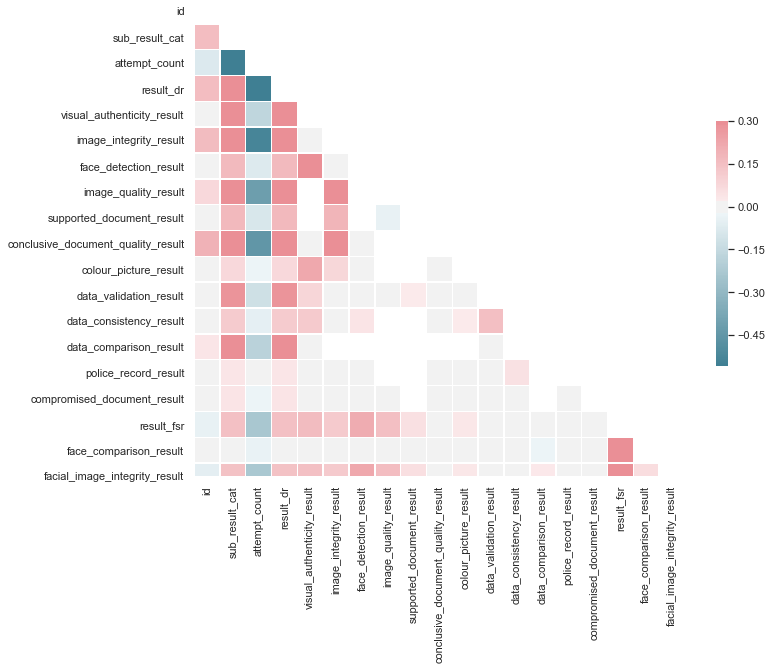

In [105]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Note: Strong positive correlation between sub_results and:
- image_integrity_result: 0.9
- image_quality_result: 0.7
- conclusive_document_quality_result: 0.9
- data_comparison_result: 0.9
Moderate negative correlation with attempt_count (-0.6).

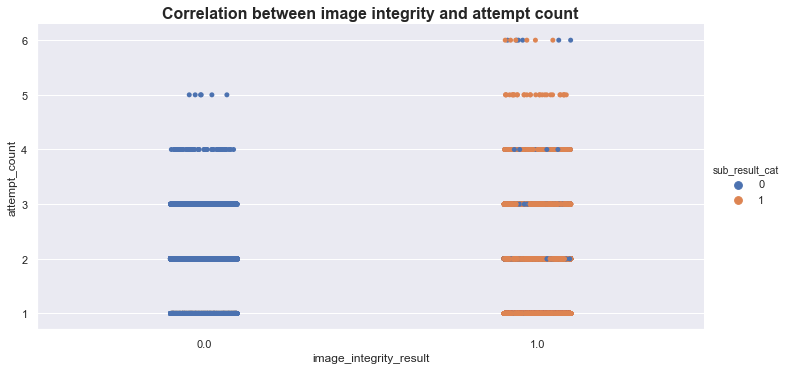

In [11]:
sns.catplot(x='image_integrity_result', y='attempt_count', hue = 'sub_result_cat', data=cat_var, aspect=2)
plt.title('Correlation between image integrity and attempt count', weight='bold', fontsize=16)
plt.show()

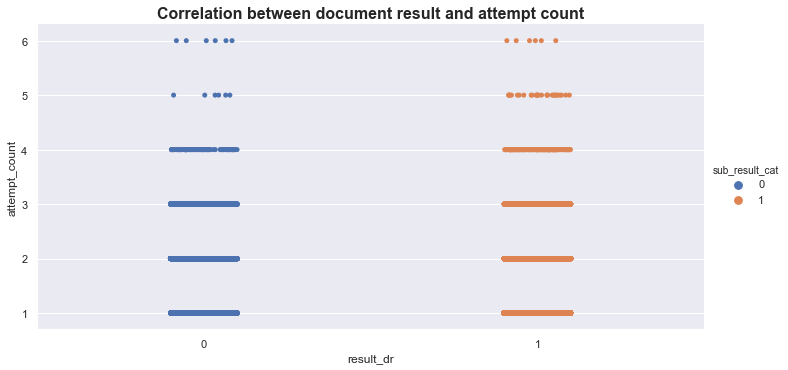

In [14]:
sns.catplot(x='result_dr', y='attempt_count', hue = 'sub_result_cat', data=cat_var, aspect=2)
plt.title('Correlation between document result and attempt count', weight='bold', fontsize=16)
plt.show()

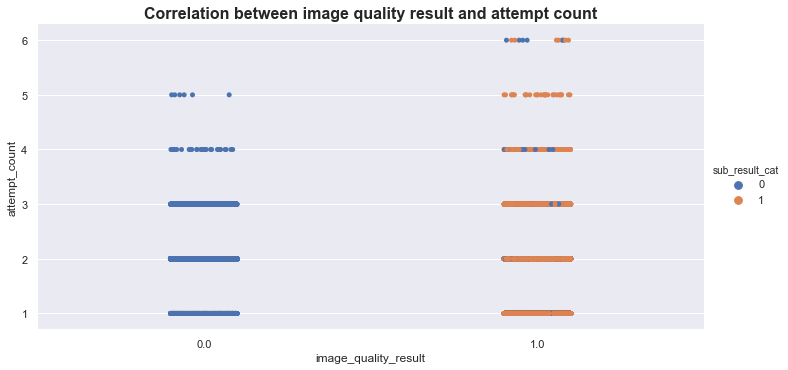

In [18]:
sns.catplot(x='image_quality_result', y='attempt_count', hue = 'sub_result_cat', data=cat_var, aspect=2)
plt.title('Correlation between image quality result and attempt count', weight='bold', fontsize=16)
plt.show()

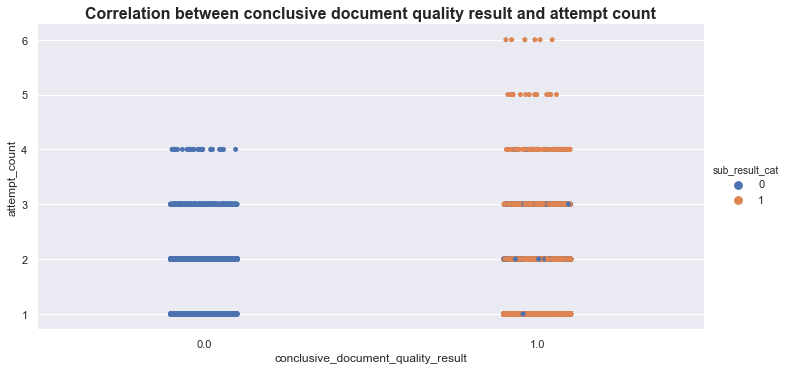

In [19]:
sns.catplot(x='conclusive_document_quality_result', y='attempt_count', hue = 'sub_result_cat', data=cat_var, aspect=2)
plt.title('Correlation between conclusive document quality result and attempt count', weight='bold', fontsize=16)
plt.show()